<a href="https://colab.research.google.com/github/SuhelAnsari9272/Appliance-Energy-Prediction/blob/main/Appliance_energy_Suhel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#mount drive


In [ ]:
file_path = '/content/drive/MyDrive/data_application_energy.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.shape

(19735, 29)

###Data description

* date time year-month-day hour:minute:second
* Appliances, energy use in Wh (Dependent variable)
* lights, energy use of light fixtures in the house in Wh (Drop this column)
* T1: Temperature in kitchen area in Celsius
* RH1: Humidity in kitchen area in %
* T2: Temperature in living room area in Celsius
* RH2: Humidity in living room area in %
* T3: Temperature in laundry room area in Celsius
* RH3: Humidity in laundry room area in %
* T4: Temperature in office room in Celsius
* RH4: Humidity in office room in %
* T5: Temperature in bathroom in Celsius
* RH5: Humidity in bathroom in %
* T6: Temperature outside the building (north side) in Celsius
* RH6: Humidity outside the building (north side) in %
* T7: Temperature in ironing room in Celsius
* RH7: Humidity in ironing room in %
* T8: Temperature in teenager room 2 in Celsius
* RH8: Humidity in teenager room 2 in %
* T9: Temperature in parents room in Celsius
* RH9: Humidity in parents room in %
* Tout: Temperature outside (from Chievres weather station) in Celsius
* Pressure (from Chievres weather station) in mm Hg
* RHout: Humidity outside (from Chievres weather station) in %
* Wind speed (from Chievres weather station) in m/s
* Visibility (from Chievres weather station) in km
* Tdewpoint (from Chievres weather station) Â°C
* rv1: Random variable 1
* rv2: Random variable 2

In [ ]:
# Creating dictionary for renaming the columns

col_rename={'T1':'temp_kitchen','RH_1':'humidity_kitchen',
            'T2':'temp_living','RH_2':'humidity_living',
            'T3':'temp_laundry','RH_3':'humidity_laundry',
            'T4':'temp_office','RH_4':'humidity_office',
            'T5':'temp_bath', 'RH_5':'humidity_bath',
            'T6':'temp_out', 'RH_6':'humidity_out',
            'T7':'temp_ironing', 'RH_7':'humidity_ironing',
            'T8':'temp_teenage','RH_8':'humidity_teenage', 
            'T9':'temp_parent', 'RH_9':'humidity_parent', 
            'T_out':'temp_station', 'RH_out':'humidity_station'
            }

In [ ]:
# Renaming the columns

df.rename(columns=col_rename,inplace=True)
df.head()

,date,Appliances,lights,temp_kitchen,humidity_kitchen,temp_living,humidity_living,temp_laundry,humidity_laundry,temp_office,...,temp_parent,humidity_parent,temp_station,Press_mm_hg,humidity_station,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Segregating Temperature,humidity and weather indicators fr seperate initial exploration

temperature_list = [feature for feature in df.columns if 'temp' in feature.split('_')]
humidity_list = [feature for feature in df.columns if 'humidity' in feature.split('_')]
weather_indicators = [feature for feature in df.columns if feature not in temperature_list and feature not in humidity_list]

print(temperature_list,'\n',humidity_list,'\n',weather_indicators)

['temp_kitchen', 'temp_living', 'temp_laundry', 'temp_office', 'temp_bath', 'temp_out', 'temp_ironing', 'temp_teenage', 'temp_parent', 'temp_station'] 
 ['humidity_kitchen', 'humidity_living', 'humidity_laundry', 'humidity_office', 'humidity_bath', 'humidity_out', 'humidity_ironing', 'humidity_teenage', 'humidity_parent', 'humidity_station'] 
 ['date', 'Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
df[temperature_list].describe()

,temp_kitchen,temp_living,temp_laundry,temp_office,temp_bath,temp_out,temp_ironing,temp_teenage,temp_parent,temp_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


* The temperatures outside  the house <b> temp_out</b> and at weather station <b> temp_station </b> is more deviated from the mean and also more skewed  than other temperature variables. It may be the case that sensors might have been kept outside.

In [ ]:
df[humidity_list].describe()

,humidity_kitchen,humidity_living,humidity_laundry,humidity_office,humidity_bath,humidity_out,humidity_ironing,humidity_teenage,humidity_parent,humidity_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


* Most deviation from the mean is seen for the humidity outside the house <b> humidity_out </b> and humidity at weather station <b> humidity_station </b>.

In [ ]:
df[weather_indicators].describe()

,Appliances,lights,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,755.522602,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,7.399441,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,729.300000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,750.933333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,756.100000,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,760.933333,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,772.300000,14.000000,66.000000,15.500000,49.996530,49.996530


* Upto <b>75%  of Appliances consumption is less than 100 unit </b>. Thus there is less cases present with very high consumption of appliances.
* The distibution of the <b> rv1 and rv2 </b> is almost same. So we can remove one variable to overcome <b> multicollinearity.</b>
* The <b>75% of observations</b> for <b> light </b> column is 0. So we can drop that column to maintain the purity of the data.

In [ ]:
# Dropping less significant lights feature from the dataset 

df.drop('lights',axis=1,inplace = True)

####Eda on Date time column

In [ ]:
# Converting  date feature to datetime Dtype from object Dtype 
df['date'] = pd.to_datetime(df.date)


Text(0, 0.5, 'Appliances energy')

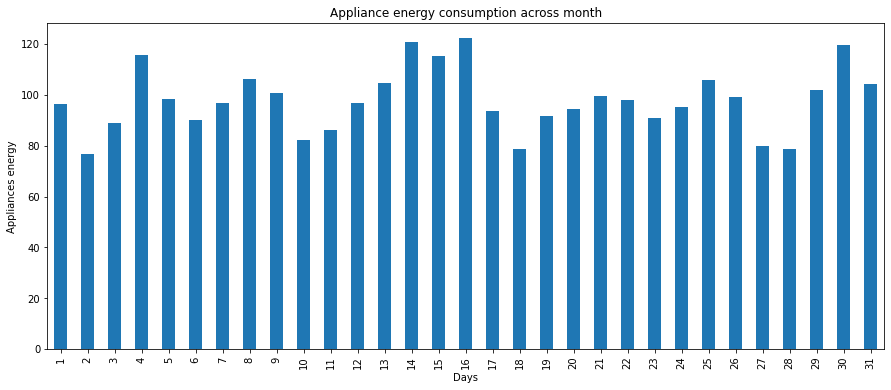

In [ ]:
#day wise appliance energy consumption
df['date'] = pd.to_datetime(df.date)

day_consumption=df.groupby(df['date'].dt.day)['Appliances'].mean()
plt.figure(figsize=(15,6))
day_consumption.plot(kind='bar')
plt.title('Appliance energy consumption across month')
plt.xlabel('Days')
plt.ylabel('Appliances energy')

* A pattern is being seen in consumption of appliances on different days of a month

Text(0, 0.5, 'Appliances energy')

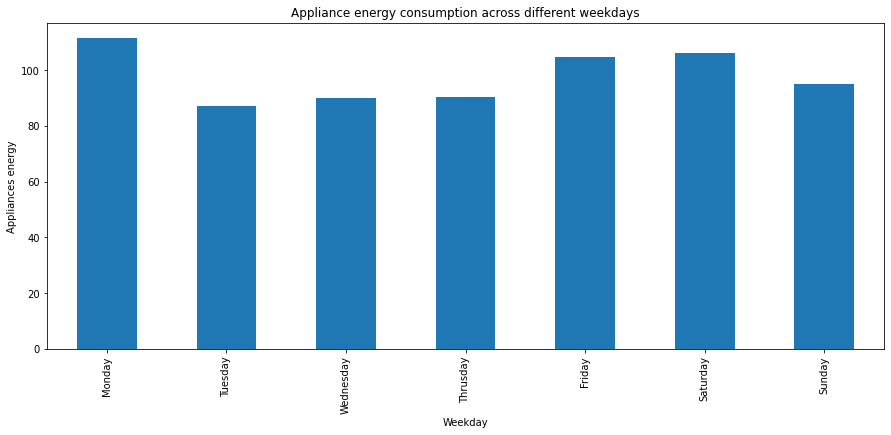

In [ ]:
#Appliance sconsumption across different weekdays

weekly_consumption=df.groupby(df['date'].dt.weekday)['Appliances'].mean()
plt.figure(figsize=(15,6))
weekly_consumption.plot(kind='bar')
days=['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']
plt.title('Appliance energy consumption across different weekdays')
plt.xticks(weekly_consumption.index,days)
plt.xlabel('Weekday')
plt.ylabel('Appliances energy')

In [ ]:
df1=df.copy()

In [ ]:
df1=df.copy()
df1['Time_hour']=df1['date'].dt.hour
#categories of minimum nights column
phase=['Morning','Day','Evening','Night']

conditions=[
            ((df1['Time_hour']>3) & (df1['Time_hour']<=9)),
            ((df1['Time_hour']>9) & (df1['Time_hour']<=15)),
            ((df1['Time_hour']>15) & (df1['Time_hour']<=21)),
            (((df1['Time_hour']>21) & (df1['Time_hour'] <=23)) | ((df1['Time_hour']>=0) & (df1['Time_hour'] <=3)))
            ]

# creating a new column time_inteval in the dataframe according to the conditions
df1['Time_phase'] = np.select(conditions, phase)

# updated DataFrame
df1.head()

,date,Appliances,temp_kitchen,humidity_kitchen,temp_living,humidity_living,temp_laundry,humidity_laundry,temp_office,humidity_office,...,temp_station,Press_mm_hg,humidity_station,Windspeed,Visibility,Tdewpoint,rv1,rv2,Time_hour,Time_phase
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,Evening
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,Evening
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,Evening
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,Evening
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,Evening


Text(0, 0.5, 'Appliances energy')

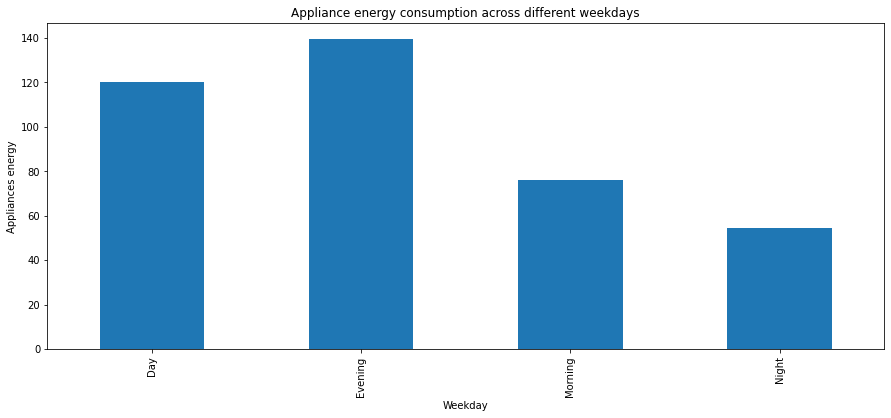

In [ ]:
#Appliance sconsumption across different weekdays

phase_consumption=df1.groupby('Time_phase')['Appliances'].mean()
plt.figure(figsize=(15,6))
phase_consumption.plot(kind='bar')
plt.title('Appliance energy consumption across different weekdays')
plt.xlabel('Weekday')
plt.ylabel('Appliances energy')

* The maximum appliance cunsumption is in Evening phase ie Time hour between 15 to 21 .
* The least consumption is in Night phase ie Time hour between 22 to 03 .

We can also drop the date column data as it is not a time series analysis.

In [ ]:
df1=df.drop('date',axis=1)

###eda on features columns

In [ ]:
df1.head()

,Appliances,temp_kitchen,humidity_kitchen,temp_living,humidity_living,temp_laundry,humidity_laundry,temp_office,humidity_office,temp_bath,...,temp_parent,humidity_parent,temp_station,Press_mm_hg,humidity_station,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#features except the dependent 'appliances' and 'date' columns
features=df1.drop(['Appliances'],axis=1)

In [ ]:
features.head()

,temp_kitchen,humidity_kitchen,temp_living,humidity_living,temp_laundry,humidity_laundry,temp_office,humidity_office,temp_bath,humidity_bath,...,temp_parent,humidity_parent,temp_station,Press_mm_hg,humidity_station,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


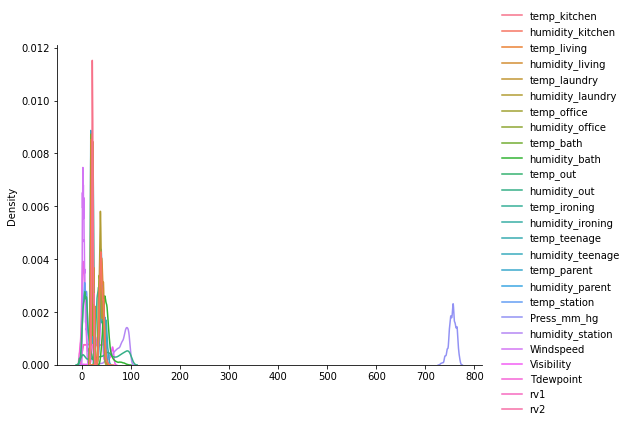

In [ ]:
#histogram of the features to see the distribution of the data
sns.displot(
  data=features,
  kind="kde",
  aspect=1.4
)

* We need to perform feature scaling as <b> Press_mm_hg</b> has values in different range than others variable.

In [ ]:
features_name=features.columns
features_name

Index(['temp_kitchen', 'humidity_kitchen', 'temp_living', 'humidity_living',
       'temp_laundry', 'humidity_laundry', 'temp_office', 'humidity_office',
       'temp_bath', 'humidity_bath', 'temp_out', 'humidity_out',
       'temp_ironing', 'humidity_ironing', 'temp_teenage', 'humidity_teenage',
       'temp_parent', 'humidity_parent', 'temp_station', 'Press_mm_hg',
       'humidity_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

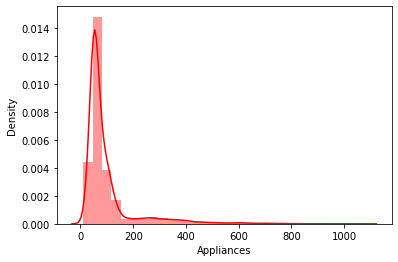

In [ ]:
#distribution of the target variable
sns.distplot(df['Appliances'], kde = True, color ='red', bins = 30)

([<matplotlib.axis.XTick at 0x7f203e58d210>,
 <a list of 44 Text major ticklabel objects>)

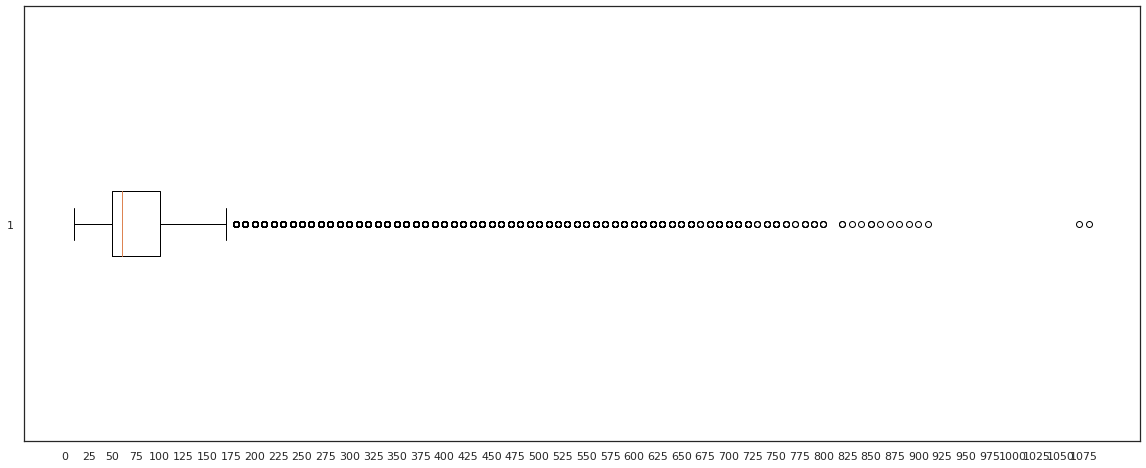

In [ ]:
#boxplot of Target variable
plt.rcParams['figure.figsize'] = (20,8)
plt.boxplot(df['Appliances'], vert = False, manage_ticks = True, showfliers = True)
plt.xticks(np.arange(0, max(df['Appliances'])+1, 25))

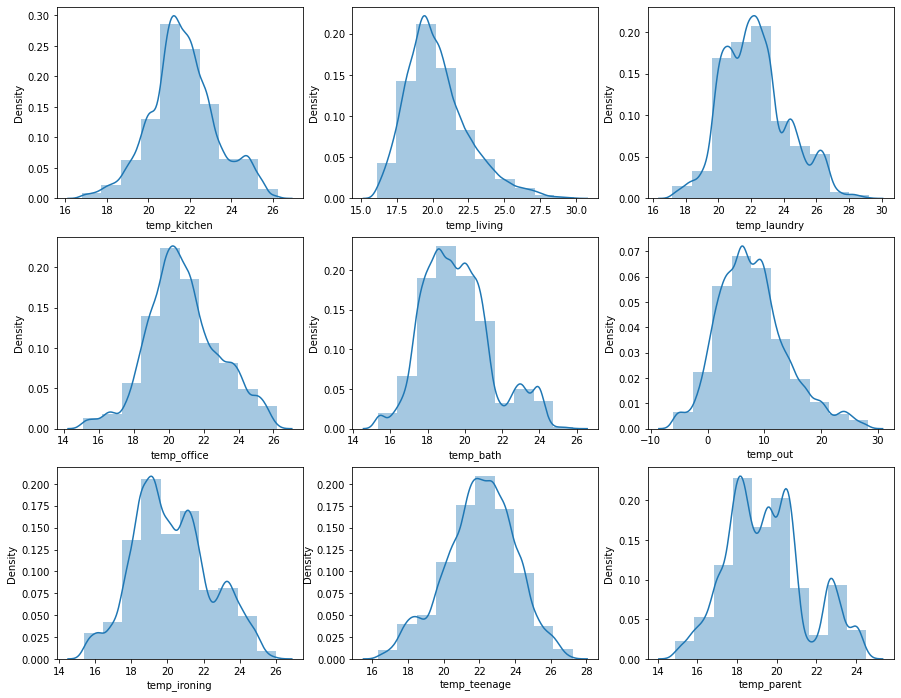

In [ ]:
#plot of distibution of the temperature variables
f,ax = plt.subplots(3,3,figsize=(15,12))
fig = sns.distplot(features['temp_kitchen'],bins=10,ax=ax[0][0])
fig = sns.distplot(features['temp_living'],bins=10,ax=ax[0][1])
fig = sns.distplot(features['temp_laundry'],bins=10,ax=ax[0][2])
fig = sns.distplot(features['temp_office'],bins=10,ax=ax[1][0])
fig = sns.distplot(features['temp_bath'],bins=10,ax=ax[1][1])
fig = sns.distplot(features['temp_out'],bins=10,ax=ax[1][2])
fig = sns.distplot(features['temp_ironing'],bins=10,ax=ax[2][0])
fig = sns.distplot(features['temp_teenage'],bins=10,ax=ax[2][1])
fig = sns.distplot(features['temp_parent'],bins=10,ax=ax[2][2])


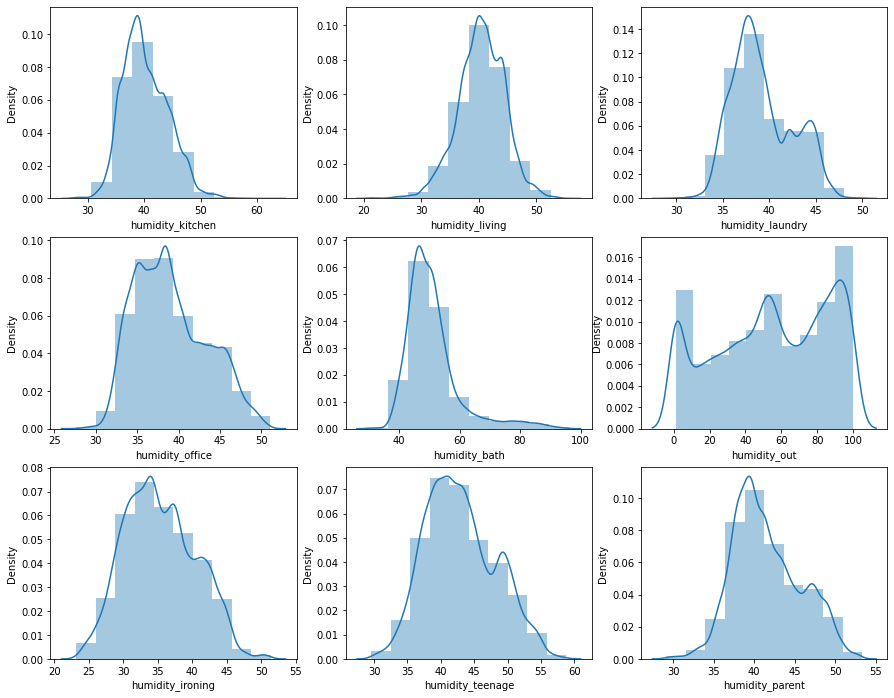

In [ ]:
#plot of distibution of the humidity variables
f,ax = plt.subplots(3,3,figsize=(15,12))
fig = sns.distplot(features['humidity_kitchen'],bins=10,ax=ax[0][0])
fig = sns.distplot(features['humidity_living'],bins=10,ax=ax[0][1])
fig = sns.distplot(features['humidity_laundry'],bins=10,ax=ax[0][2])
fig = sns.distplot(features['humidity_office'],bins=10,ax=ax[1][0])
fig = sns.distplot(features['humidity_bath'],bins=10,ax=ax[1][1])
fig = sns.distplot(features['humidity_out'],bins=10,ax=ax[1][2])
fig = sns.distplot(features['humidity_ironing'],bins=10,ax=ax[2][0])
fig = sns.distplot(features['humidity_teenage'],bins=10,ax=ax[2][1])
fig = sns.distplot(features['humidity_parent'],bins=10,ax=ax[2][2])

In [ ]:
features_name

Index(['temp_kitchen', 'humidity_kitchen', 'temp_living', 'humidity_living',
       'temp_laundry', 'humidity_laundry', 'temp_office', 'humidity_office',
       'temp_bath', 'humidity_bath', 'temp_out', 'humidity_out',
       'temp_ironing', 'humidity_ironing', 'temp_teenage', 'humidity_teenage',
       'temp_parent', 'humidity_parent', 'temp_station', 'Press_mm_hg',
       'humidity_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

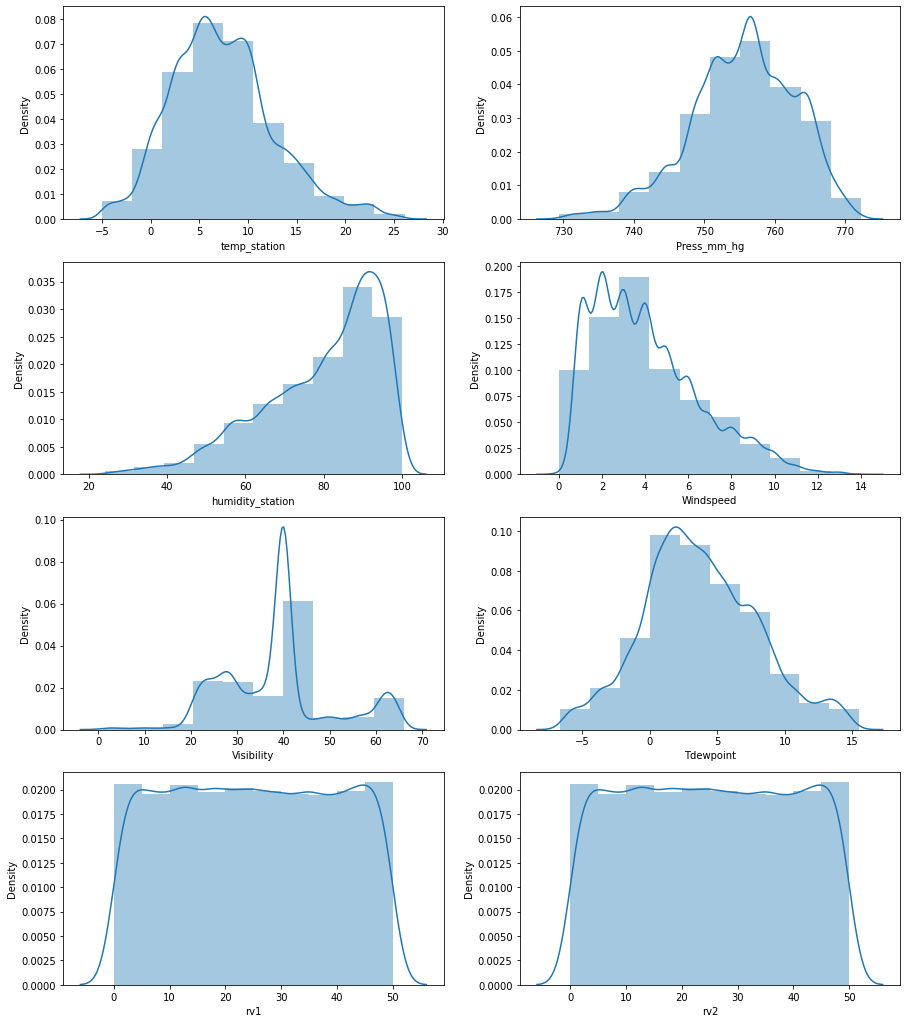

In [ ]:
#plot of rest of the features in the dataset
f,ax = plt.subplots(4,2,figsize=(15,18))
fig = sns.distplot(features['temp_station'],bins=10,ax=ax[0][0])
fig = sns.distplot(features['Press_mm_hg'],bins=10,ax=ax[0][1])
fig = sns.distplot(features['humidity_station'],bins=10,ax=ax[1][0])
fig = sns.distplot(features['Windspeed'],bins=10,ax=ax[1][1])
fig = sns.distplot(features['Visibility'],bins=10,ax=ax[2][0])
fig = sns.distplot(features['Tdewpoint'],bins=10,ax=ax[2][1])
fig = sns.distplot(features['rv1'],bins=10,ax=ax[3][0])
fig = sns.distplot(features['rv2'],bins=10,ax=ax[3][1])

In [ ]:
# Checking if all values under columns random varable 1 and random variable 2 are same.
print(f" It's {df[df['rv1'] == df['rv2']]['date'].count() == df['date'].size} that all the values under columns Random Variable 1 and Random Variable 2 are same")

 It's True that all the values under columns Random Variable 1 and Random Variable 2 are same


* rv1 and rv2 have same distribution so we drop one variable

In [ ]:
df1=df1.drop('rv2',axis=1)

Text(0, 0.5, 'Temperatures')

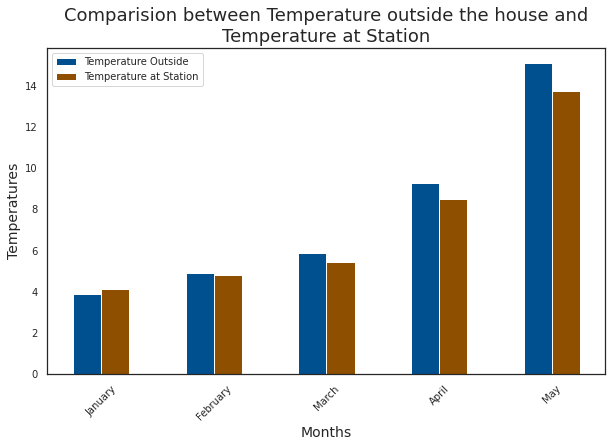

In [ ]:
#Temperature outside VS Temperature at Station
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_out' : 'mean'})['temp_out'], width = 0.25, label = 'Temperature Outside', color = '#004f8f')
plt.bar(x_axis + 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_station' : 'mean'})['temp_station'], width = 0.25, label = 'Temperature at Station', color = '#8f4f00')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
plt.title('Comparision between Temperature outside the house and\nTemperature at Station', fontsize = 18)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Temperatures', fontsize = 14)

In [ ]:
df1.head()

,Appliances,temp_kitchen,humidity_kitchen,temp_living,humidity_living,temp_laundry,humidity_laundry,temp_office,humidity_office,temp_bath,...,humidity_teenage,temp_parent,humidity_parent,temp_station,Press_mm_hg,humidity_station,Windspeed,Visibility,Tdewpoint,rv1
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097


###Feature Engineering

### Scatterplot

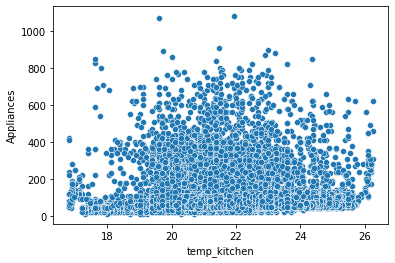

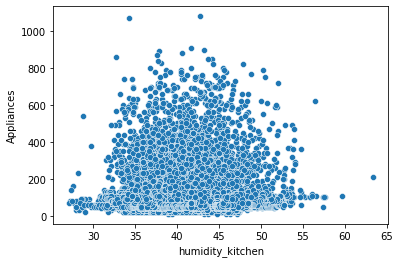

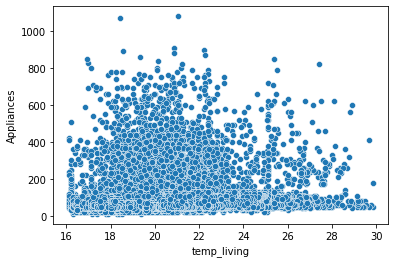

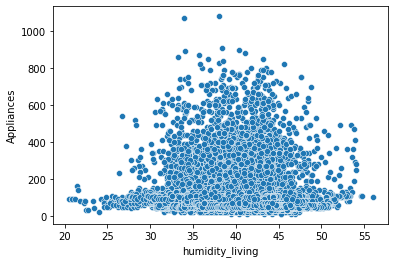

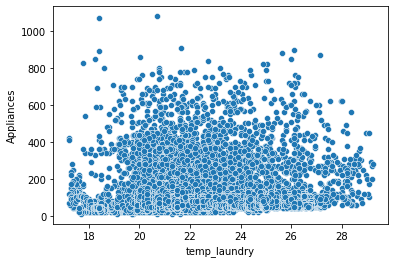

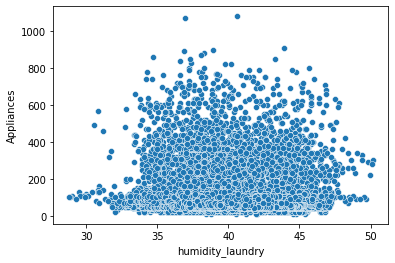

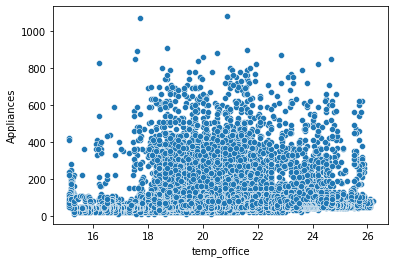

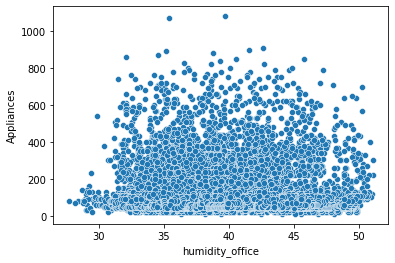

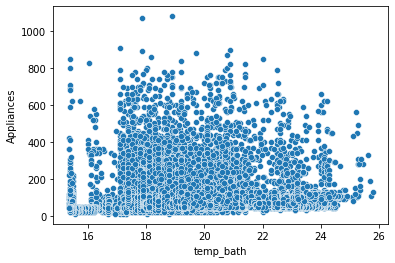

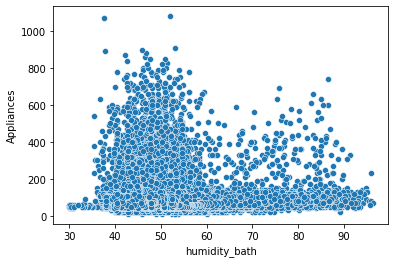

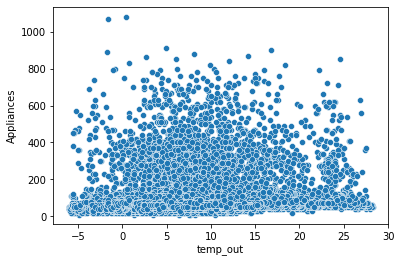

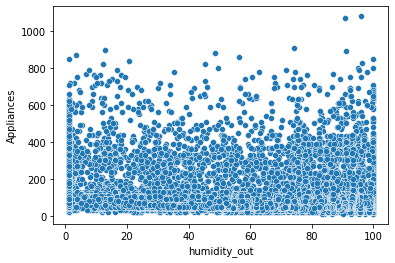

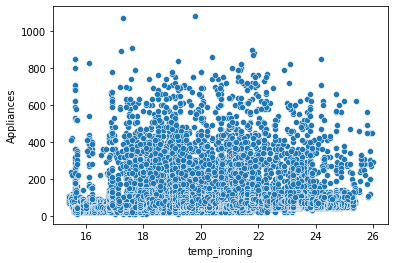

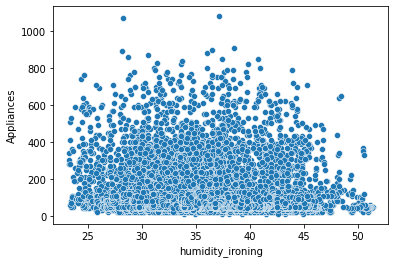

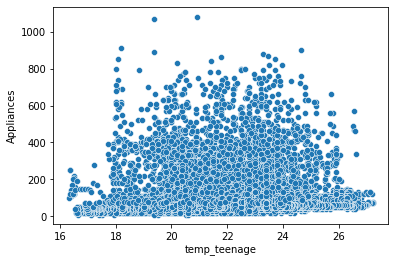

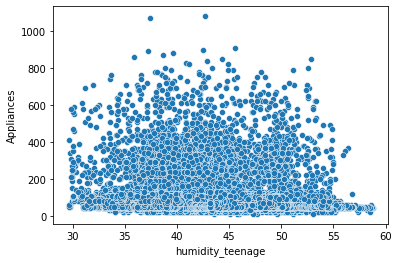

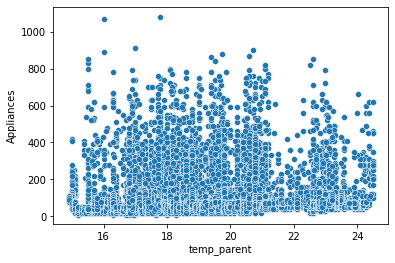

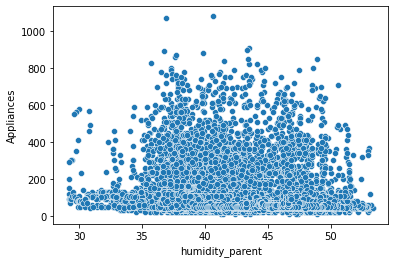

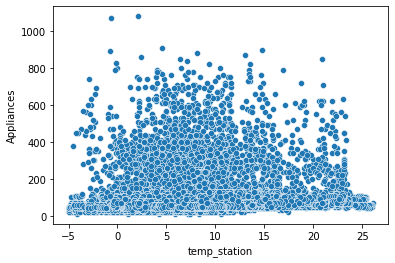

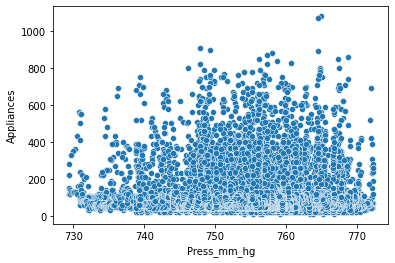

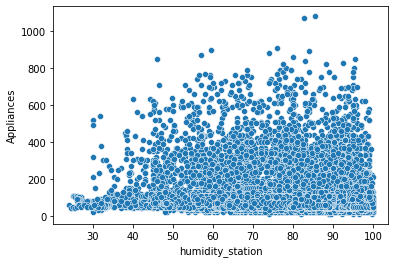

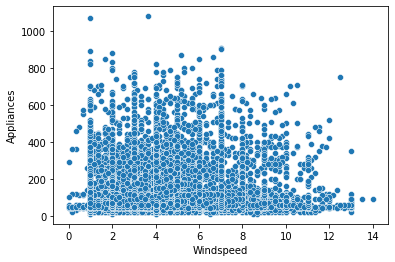

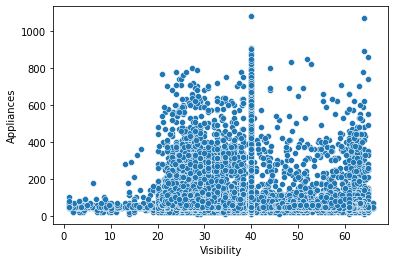

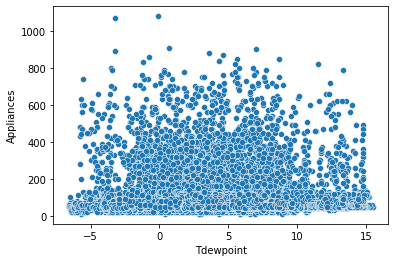

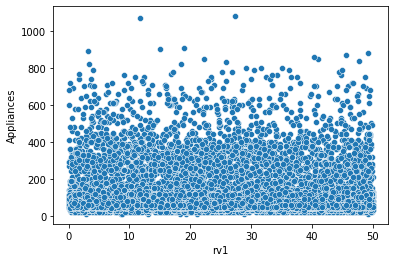

In [ ]:
for i, predictor in enumerate(df1.drop(columns=['Appliances'])):
    plt.figure(i)
    sns.scatterplot(data=df1, x=predictor,y='Appliances')

###Correlation plot

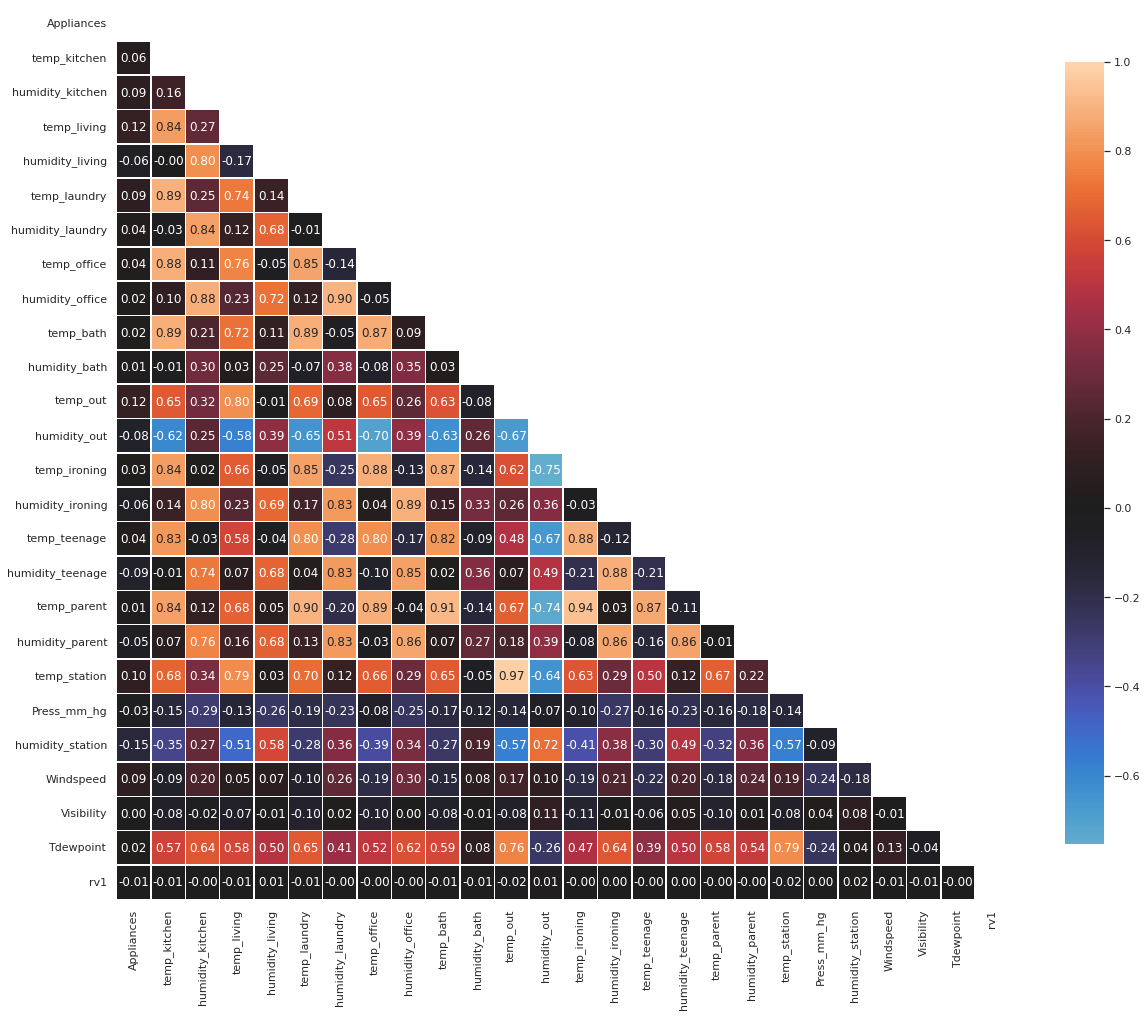

In [ ]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True,mask=mask,fmt=".2f", vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":0.8})

* The Target variable 'Appliances' don't have a good correlation of any of features column
* The columns'rv1' and 'visiblity' have very low correlation with other variables
* The temperature variables have a good postive correation among themselves.

In [ ]:
(df['rv1']==df['rv2']).unique()
df = df.drop(['rv2','date'],axis=1).rename(columns={'rv1':'Random variable'})

In [ ]:
#outlier removal 
def remove_outlier(df):
  """
  This fuction is used for Outlier Removal.
  """
  
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df

temp_series = remove_outlier(df.Appliances)
temp_df = pd.DataFrame(temp_series)
ind_diff= df.index.difference(temp_df.index)

for i in range(0, len(ind_diff),1):
  df = df.drop([ind_diff[i]])

plt.boxplot(df['Appliances'])
plt.show()

In [ ]:
# Train Test Spitting
scaler = MinMaxScaler()
X = df[[col for col in df.columns if col not in ['Appliances']]]
y = df['Appliances']

X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(y.values.reshape([-1,1])).flatten()

X_train,X_test,y_train,y_test = train_test_split(X_scale,y_scale,test_size = 0.3, random_state = 0)
print(f'Scaled Feature values :\n{X_scale}\n')
print(f'Scaled Target values:\n{y_scale}')